<a href="https://colab.research.google.com/github/pranavrao87/Machine-Learning/blob/main/Classification%20Models/02_neural_network_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification w/ tensorflow

Learning how to write neural networks for classification problems
- Classification problem: when you to try to classify something as one thing or another
    - Binary classification
    - Multiclass classification
    - Multilabel classification


# Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Visualizing data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1": X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


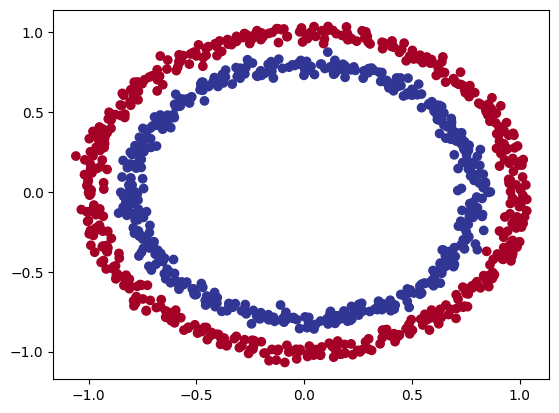

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# number of samples
len(X), len(y)

(1000, 1000)

In [8]:
# View 1st example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1. Create or import model
2. Compile model
3. Fit model
4. Evaluate model


In [9]:
import tensorflow as tf

In [10]:
# Set random seet
tf.random.set_seed(42)

# 1. Create model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 3ms/step - loss: 6.2598 - accuracy: 0.4900
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 6.2432 - accuracy: 0.4890
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 6.0276 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 7ms/step - loss: 5.0596 - accuracy: 0.4560
Epoch 5/5
32/32 [==============================] - 0s 11ms/step - loss: 4.6564 - accuracy: 0.4620


In [11]:
# Train model for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

50% accuracy on a binary classification model indicates that model is just guessing...

In [12]:
# Add extra layer
tf.random.set_seed(42)

# 1. Create model w/ 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Train model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933194994926453, 0.5]

## Improving Model

1. Create model - add more layers or increase num of hidden units w/in layer
2. Compile model - choose diff optimization function (Adam instead of SGD)
3. Fit model - train for more epochs

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create model w/ 3 layers
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add layers w/ 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. Evaluate model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.5050


[0.6976210474967957, 0.5049999952316284]

Create function to visualize function predictions: 'plot_decision_boundary()'
- Take in trained model, features (X) labels (y)
- Create a meshgrid of diff X vals
- Make predictions across meshgrid
- Plot predictions as well as trends line b/w zones where each unique class falls

In [16]:
import numpy as np


In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots decision boundary created by model predicting on X.
      1. CS231n - https://cs231n.github.io/neural-networks-case-study/
      2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define axis boundaries of plot and create meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (going to predict on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1:
    print("Multiclass classification")
    # Reshape predictions to get ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decisions
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Binary classification


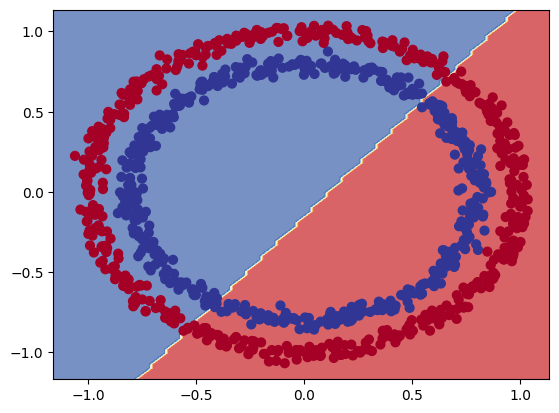

In [18]:
# Check predictions model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [19]:
# Try model on regression data

tf.random.set_seed(42)

# Regression data
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) # y = X + 100
X_reg, y_reg

# Split data into training and test sets
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

# Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

model_3 developed for binary classification problem which uses loss=BinaryCrossentropy, but regression problem requires a loss function usually of mae or mse

In [20]:
# rand seed
tf.random.set_seed(42)

# 1. Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model w/ regression specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 389.1875 - mae: 389.1875
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 278.9796 - mae: 278.9796
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 172.4401 - mae: 172.4401
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 64.3182 - mae: 64.3182
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2066 - mae: 71.2066
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 86.7952 - mae: 86.7952
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 59.7949 - mae: 59.7949
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 44.5331 - mae: 44.5331
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 46.4246 - mae: 46.4246
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.2091 - mae: 42.2091
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 9ms/step


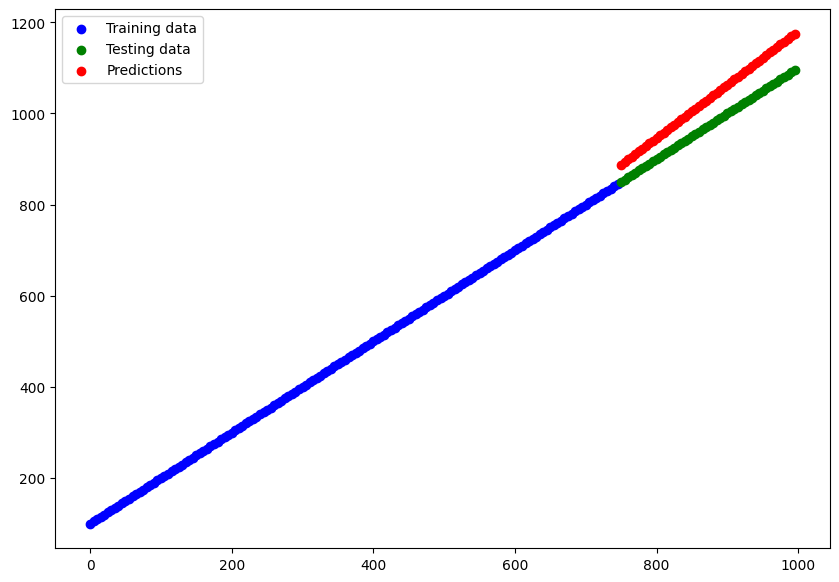

In [21]:
# Make predictions w/ trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot model's predictions against data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## Non-linearity

In [22]:
# Rebuild this model: https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=1&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# Rand seed
tf.random.set_seed(42)

# 1. Create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.5404 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5159 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5041 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4797 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4744 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4543 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4273 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3773 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3512 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2432 - accuracy: 0.4790
Epoch 11/

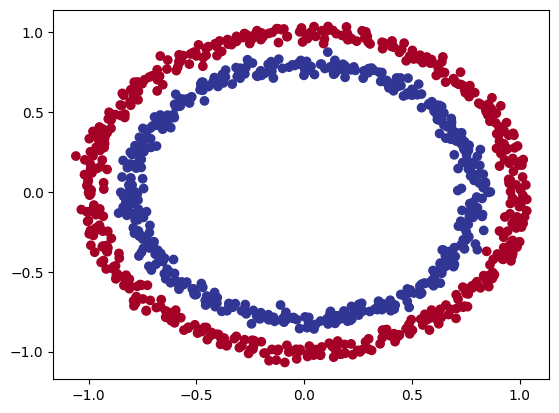

In [23]:
# Visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
Binary classification


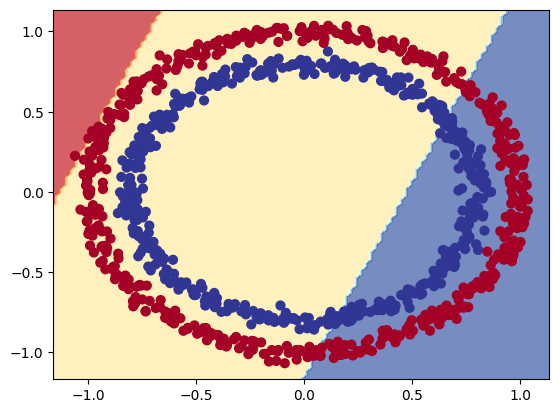

In [24]:
# Decision boundary for latest model
plot_decision_boundary(model_4, X, y)

Use non-linear activation function

In [25]:
# Set rand seed
tf.random.set_seed(42)

# 1. Create model w/ non-linear activation function (anything but linear activation)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 5.8518 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8071 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7679 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7624 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 5.7516 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7337 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7310 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7291 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7274 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7176 - accuracy: 0.4840
Epoch 11/

313/313 [==============================] - 2s 4ms/step
Binary classification


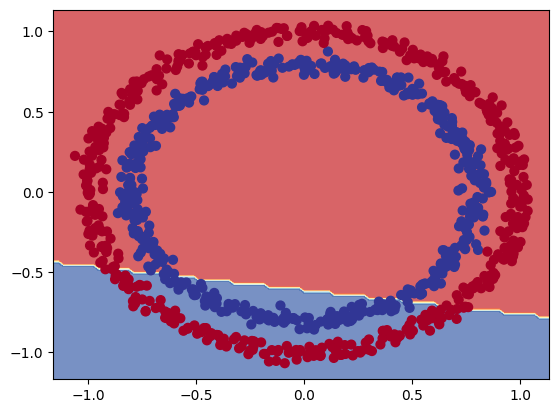

In [30]:
plot_decision_boundary(model_5, X, y)

In [39]:
# Set rand seed
tf.random.set_seed(42)

# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,3,1&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
# 1. Create model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 5s 5ms/step - loss: 0.7291 - accuracy: 0.4950
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7144 - accuracy: 0.4890
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.7078 - accuracy: 0.4600
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7039 - accuracy: 0.4450
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4690
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4670
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4670
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4750
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4740
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4450
Epoch 11/

313/313 [==============================] - 1s 2ms/step
Binary classification


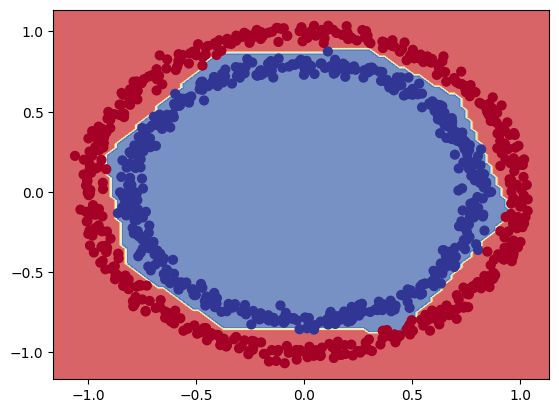

In [40]:
plot_decision_boundary(model_6, X, y)

In [41]:
# https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.26333&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

# Set rand seed
tf.random.set_seed(42)

# 1. Create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [42]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
Binary classification


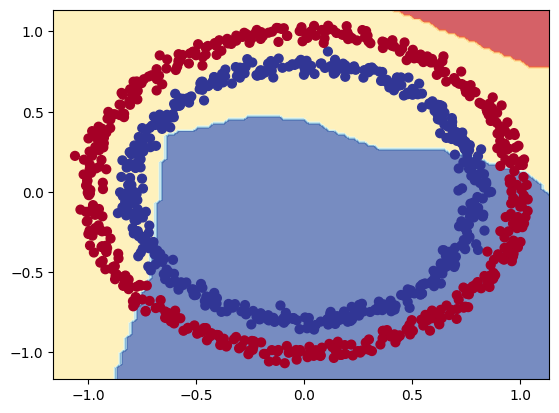

In [43]:
plot_decision_boundary(model_7, X, y)

In [54]:
# Output layer has diff activation function

# Set rand seed
tf.random.set_seed(42)

# 1. Create model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit model
history = model_8.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.7414 - accuracy: 0.4960
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7276 - accuracy: 0.4980
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7189 - accuracy: 0.4800
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7136 - accuracy: 0.4670
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7100 - accuracy: 0.4360
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.4030
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.4200
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.4640
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.4730
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.4670
Epoch 11/

In [55]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.9930


[0.2603487968444824, 0.9929999709129333]

313/313 [==============================] - 1s 2ms/step
Binary classification


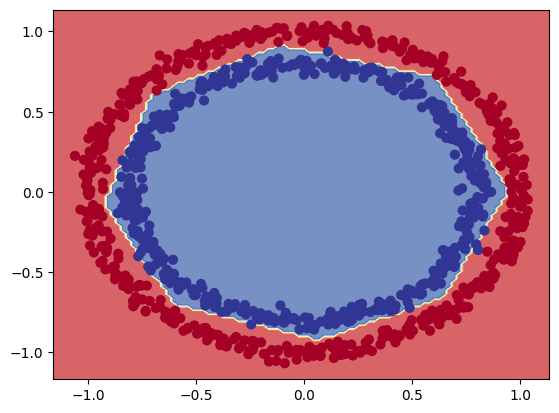

In [56]:
plot_decision_boundary(model_8, X, y)

In [58]:
# Creating a tensor to visualize non-linear and linear activation functions
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

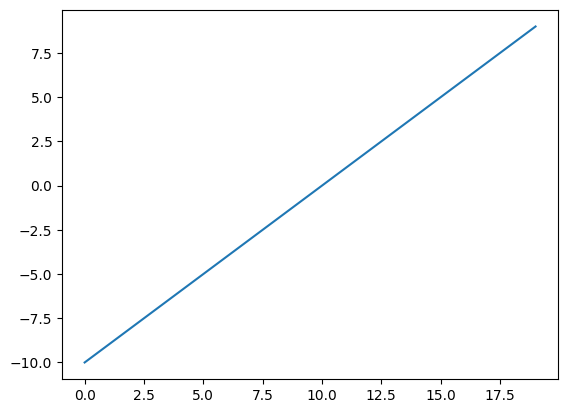

In [59]:
# Visualize tensor
plt.plot(A)